In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pprint import pprint
import pandas as pd
import os

In [2]:
from collections import defaultdict
from gensim import corpora, models, similarities

# plot projection of articles onto 2 axes/topics defined by the model; for models operating on tfidf-transformed inputs (LSI, RP)
def plot_axes_with_tfidf(x, y, model, corpus, tfidf, titles):
    """Plot each article title according to the projection of its text 
    into the given x and y topic axes of model.
    
    :param x: the index of the x axis to plot
    :param y: the index of the y axis to plot
    :param model: the gensim model to project into
    :param corpus: the gensim corpus of documents
    :param tfidf: a tfidf model for converting documents into tfidf space
    :param titles: a list of article titles
    """
    x_data = defaultdict(list) 
    y_data = defaultdict(list) 
    arts = defaultdict(list)  
    for title, doc in zip(titles, corpus):
        x_data[0].append((model[tfidf[doc]][x][1]))
        y_data[0].append((model[tfidf[doc]][y][1]))
        arts[0].append(title)
    plt.figure(figsize=(10, 10))
    ax = plt.gca()
    ax.set_xlabel('Topic '+str(x), fontsize=14)
    ax.set_ylabel('Topic '+str(y), fontsize=14)
    plt.scatter(x_data[0], y_data[0], s=40)
    for art, x, y in zip(arts[0], x_data[0], y_data[0]):
        ax.annotate(str(art), xy=(x, y), xycoords='data', xytext=(1, 1), 
        textcoords='offset points', size=10)
    
        
# plot projection of articles onto 2 axes/topics defined by the model; for models operating on original corpus (LDA, HDP)
def plot_axes(x, y, model, corpus, titles):
    """Plot each article title according to the projection of its text 
    into the given x and y topic axes of model.
    
    :param x: the index of the x axis to plot
    :param y: the index of the y axis to plot
    :param model: the gensim model to project into
    :param corpus: the gensim corpus of documents
    :param titles: a list of article titles
    """
    x_data = defaultdict(list) 
    y_data = defaultdict(list) 
    arts = defaultdict(list)  
    for title, doc in zip(titles, corpus):
        x_data[0].append((model[doc][x][1]))
        y_data[0].append((model[doc][y][1]))
        arts[0].append(title)
    plt.figure(figsize=(10, 10))
    ax = plt.gca()
    ax.set_xlabel('Topic '+str(x), fontsize=14)
    ax.set_ylabel('Topic '+str(y), fontsize=14)
    plt.scatter(x_data[0], y_data[0], s=40)
    for art, x, y in zip(arts[0], x_data[0], y_data[0]):
        ax.annotate(str(art), xy=(x, y), xycoords='data', xytext=(1, 1), 
        textcoords='offset points', size=10)  

In [3]:
os.chdir('../data/')
# Read dataframe
#input_fname="AutismParentMagazine-posts-tokens.csv"
input_fname="articles-n-forums-posts.csv"

df = pd.read_csv(input_fname,index_col=0)
df.head(2)


,category,href,source,text,title,user id,href_short,tokens,text_short
post id,,,,,,,,,
0,['category-applied-behavior-analysis-aba'],https://www.autismparentingmagazine.com/autism...,https://www.autismparentingmagazine.com/,For children with autism spectrum disorder (AS...,"Autism, Head Banging and other Self Harming Be...",NaN,AutismParentingMagazine,"['autism', 'head', 'bang', 'and', 'other', 'se...",For children with autism spectrum disorder (AS...
1,['category-applied-behavior-analysis-aba'],https://www.autismparentingmagazine.com/high-q...,https://www.autismparentingmagazine.com/,Dr. Stephen Shore once said “If you’ve met one...,High Quality ABA Treatment: What Every Parent...,NaN,AutismParentingMagazine,"['high', 'quality', 'aba', 'treatment', 'what'...",Dr. Stephen Shore once said “If you’ve met one...


In [32]:
import pickle
# Read models
corpus = pickle.load(open("corpus.save", "rb"))
tfidf = models.TfidfModel.load('tfidf.save')
lsimodel = models.LsiModel.load('lsi-model.save')
dictionary = pickle.load(open("dictionary.save","rb"))


In [5]:
# Plot topics
titles = df['title']
categories = df['category']

topics_articles=[]
topics_forums=[]
for category,title, doc in zip(categories,titles, corpus):
    top_topic=max(lsimodel[tfidf[doc]],key=lambda x:x[1])
    if category == 'forums':
        topics_forums.append(top_topic)
    else:
        topics_articles.append(top_topic)





In [6]:
print(df.loc[0])
lsimodel.show_topic(289,topn=10)

category             ['category-applied-behavior-analysis-aba']
href          https://www.autismparentingmagazine.com/autism...
source                 https://www.autismparentingmagazine.com/
text          For children with autism spectrum disorder (AS...
title         Autism, Head Banging and other Self Harming Be...
user id                                                     NaN
href_short                              AutismParentingMagazine
tokens        ['autism', 'head', 'bang', 'and', 'other', 'se...
text_short    For children with autism spectrum disorder (AS...
Name: 0, dtype: object


[('around', 0.12305158080174289),
 ('even', 0.098364952544514064),
 ('make', 0.092559040791065847),
 ('date', -0.089450466733059231),
 ('cat', 0.087545662636350441),
 ('maybe', -0.083542283033303466),
 ('dx', 0.080109234670521737),
 ('fight', 0.078660670623541679),
 ('13', 0.076877130095156287),
 ('water', 0.074540367371097843)]

In [7]:
topic_index=0
topn=5 #top five words in that topic
lsimodel.show_topic(topic_index, topn=topn)

[('son', 0.13063794954097041),
 ('school', 0.12704517649180411),
 ('get', 0.12431454448172294),
 ('autism', 0.11642186607889504),
 ('go', 0.11317346349203078)]

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
from matplotlib import gridspec
import numpy as np


In [25]:
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True

plt.rcParams.update({'font.size': 24})
label_size = 18
plt.rcParams['xtick.labelsize'] = label_size 
plt.rcParams['ytick.labelsize'] = label_size 
plt.rcParams['axes.linewidth'] = 5 # set the value globally
plt.rc('axes', linewidth=2)

fig = plt.figure()
gs = gridspec.GridSpec(2, 1)

plt.subplots_adjust(left=0.2,right=1.0,bottom=0.17,top=0.9)
fig.set_size_inches(6,6)


#plt.suptitle('Readability score')
fig.text(0.04,0.5,'Distribution',va='center',rotation='vertical')
fig.text(0.4,0.04,'Topic',va='center')

In [26]:
nbins=300 #300 topics

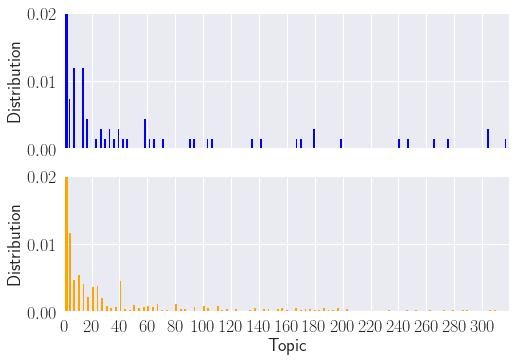

In [29]:
#X ticks

xmax=320
x=np.arange(0,xmax,20) #xtics
xx=np.arange(1,xmax,1)

# Panel 1
ax1=plt.subplot(gs[0])
ax1.set_xlim([0, xmax])
ax1.set_ylim([0,0.02])
ax1.set_xticks(x)
ax1.tick_params(labelbottom='off')    


plt.ylabel('Distribution',fontsize=18)
#Class 0
X=np.array(topics_articles)
n_articles,bins_articles,patches=plt.hist(X,nbins,normed=1,facecolor='blue',align='mid',label='articles')
#plt.legend(bbox_to_anchor=(0.45, 0.95), loc=2, borderaxespad=0., fontsize=14)



# Panel 2
ax2=plt.subplot(gs[1])
ax2.set_xlim([0, xmax])
ax2.set_xticks(x)
ax2.set_ylim([0,0.02])

plt.ylabel('Distribution',fontsize=18)
plt.xlabel('Topic',fontsize=18)

#Class 1
X=np.array(topics_forums)
n_forums,bins_forums,patches=plt.hist(X,nbins,normed=1,facecolor='orange',align='mid',label='forums')

#plt.legend(bbox_to_anchor=(0.45, 0.95), loc=2, borderaxespad=0.,fontsize=14)

fig.savefig('topic-presence.jpeg', dpi=300)
#fig.savefig('topic-presence.jpeg')

plt.show()

In [12]:
#fig.facecolor="white"
#fig.savefig('topic-presence.jpeg', dpi=300)

In [13]:
# Find top 10 topics in articles and forums
print(len(bins_forums))
print(len(n_forums[0]))
#print(n_forums[0])
print(max(topics_forums))
print(max(topics_articles))

301
300
(994, 0.076488552732848214)
(957, 0.079762229154744374)


In [14]:
def mk_topic_presence(nn):
    from operator import itemgetter

    """gets the topic presence. The result is sorteed.
    nn refers to the output n of plt.hist, which contains the topic distribution for each bin"""
    topic_presence=[]
    for n in range(len(n_forums[0])):
        topic_presence.append((n,nn[0][n]))
    # Sort topic presence:
    sorted_topic_presence=sorted(topic_presence,key=itemgetter(1),reverse=True)
    return sorted_topic_presence

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
    
def print_topics(topic_presence_list):
    topn=10 #top five words in that topic
    for topic_presence in topic_presence_list[:5]:
        topic_index=topic_presence[0]
        topic=lsimodel.show_topic(topic_index, topn=topn)
        word_list=[]
        for word,score in topic:
            word_list.append(word)
        printmd('**Topic {}**: {}'.format(topic_index,', '.join(word_list)))


In [15]:
topic_presence_articles=mk_topic_presence(n_articles)
topic_presence_articles[:5]


[(0, 0.16413319926657599),
 (4, 0.011829419766960432),
 (2, 0.01182941976696043),
 (1, 0.0073933873543502691),
 (18, 0.0044360324126101651)]

In [16]:
topic_presence_forums=mk_topic_presence(n_forums)
topic_presence_forums[:5]

[(0, 0.22153120744670041),
 (1, 0.011686279291913093),
 (3, 0.0054197237295828858),
 (2, 0.0046575750801102897),
 (12, 0.0045728918968355597)]

In [17]:
printmd("**Topics most present in articles**")
print_topics(topic_presence_articles)
printmd("**Topics most present in forums**")
print_topics(topic_presence_forums)

**Topics most present in articles**

**Topic 0**: son, school, get, autism, go, know, like, child, say, help

**Topic 4**: aspergers, discussion, school, relate, syndrome, start, people, asperger, old, speech

**Topic 2**: http, com, www, aspergers, discussion, asperger, autism, relate, son, children

**Topic 1**: aspergers, disorder, sensory, diagnosis, spectrum, speech, difficulties, children, child, discussion

**Topic 18**: im, vaccines, adhd, thank, disorder, service, diagnosis, brother, dont, children

**Topics most present in forums**

**Topic 0**: son, school, get, autism, go, know, like, child, say, help

**Topic 1**: aspergers, disorder, sensory, diagnosis, spectrum, speech, difficulties, children, child, discussion

**Topic 3**: discussion, relate, asperger, start, syndrome, sensory, aspergers, http, speech, violence

**Topic 2**: http, com, www, aspergers, discussion, asperger, autism, relate, son, children

**Topic 12**: therapy, music, aspergers, diet, vaccines, school, sensory, say, doctor, flap

In [33]:
import pyLDAvis.gensim
import gensim
pyLDAvis.enable_notebook()


# This is only for LDA
#data = pyLDAvis.gensim.prepare(lsimodel, corpus, dictionary)
#data
    

AttributeError: 'LsiModel' object has no attribute 'inference'